In [7]:
%matplotlib inline
from __future__ import unicode_literals
import pandas as pd
import numpy as np
from glob import glob
from matplotlib import pyplot as plt
import seaborn as sns
from metacog_utils import add_sdt_utils, metacog_dfs, jointplot_group
from IPython.display import display

metacog_utils.py:82: RuntimeWarning: invalid value encountered in subtract
  mecog['dprime'] = norm01.ppf(proba['hit']) - norm01.ppf(proba['fa'])


0         NaN
1    1.298571
2    1.198499
3         NaN
4    1.298534
Name: Wager RT, dtype: float64

Index([   u'intro.thisRepN',  u'intro.thisTrialN',       u'intro.thisN',
         u'intro.thisIndex', u'trials.thisTrialN',   u'trials.stepSize',
        u'trials.intensity',   u'trials.response',          u'Response',
                  u'Target',                u'c0',                u'c1',
                      u'c2',                u'c3',                u'c4',
                      u'c5',                u'c6',                u'c7',
                      u'c8',   u'circle_response',             u'Scale',
               u'Intensity',         u'TrialType',            u'Signal',
               u'Treatment',              u'cmax',             u'cmax2',
                   u'Trial',       u'Response RT',        u'Confidence',
           u'Confidence RT',             u'Wager',          u'Wager RT',
                   u'Score',              u'date',           u'expName',
               u'frameRate',              u'Name',       u'Unnamed: 38',
                     u'hit',                u'fa', 

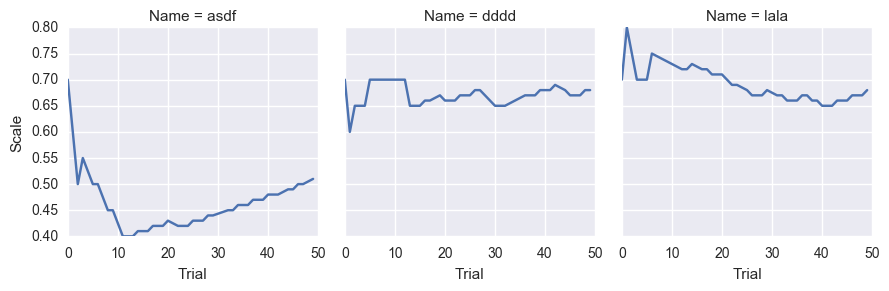

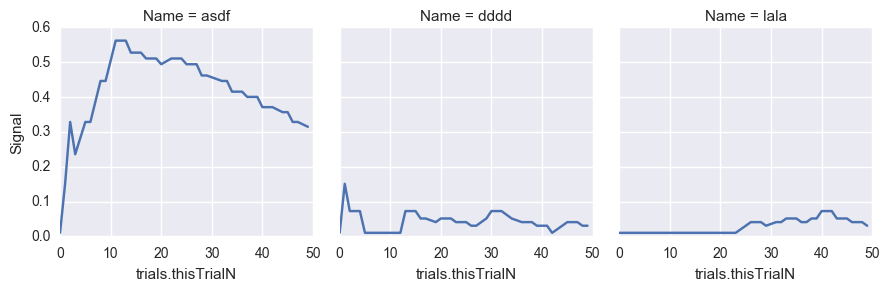

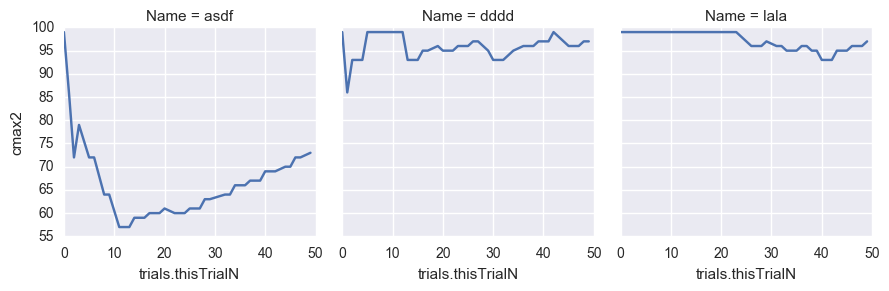

In [8]:
dfs = []
for f in glob('data/*.csv'):
    dfs.append(pd.read_csv(f, encoding='utf-8'))
df = pd.concat(dfs)
df = add_sdt_utils(df)
means, counts, proba, mecog = metacog_dfs(df)
display(df.head()['Wager RT'])
print(df.columns)
g = sns.FacetGrid(df[~df['TrialType'].str.contains('easy|hard')], col='Name',)
g.map(plt.plot, 'Trial', 'Scale')

g = sns.FacetGrid(df[~df['TrialType'].str.contains('easy|hard')], col='Name')
g.map(plt.plot, 'trials.thisTrialN', 'Signal')

g = sns.FacetGrid(df[~df['TrialType'].str.contains('easy|hard')], col='Name')
g.map(plt.plot, 'trials.thisTrialN', 'cmax2')

#plt.plot(df['trials.thisTrialN'], df['Signal'])

In [9]:
display(df.groupby('Name')[['Response', 'Signal', 'Confidence', 'Wager']].head())
display(df.groupby('Name')[['Response', 'Signal', 'Confidence', 'Wager']].mean())

,Response,Signal,Confidence,Wager
0,False,0.010050,NaN,NaN
1,False,0.150823,NaN,0.0
2,True,0.328504,NaN,1.0
3,True,0.235722,0.96,NaN
4,False,0.010050,NaN,0.0
0,False,0.010050,NaN,1.0
1,True,0.150823,0.99,NaN
2,True,0.072571,0.99,NaN
3,True,0.072571,NaN,1.0
4,True,0.072571,NaN,1.0


,Response,Signal,Confidence,Wager
Name,,,,
asdf,0.88,0.511072,0.920000,0.863636
dddd,0.82,0.195798,0.991364,1.000000
lala,0.70,0.183014,0.574545,0.863636


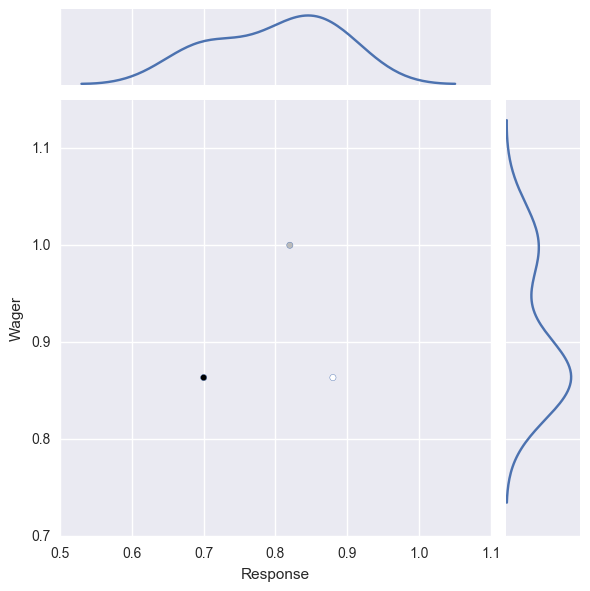

In [10]:
sns.jointplot('Response', 'Wager', means, marginal_kws={'hist': False, 'kde': True}, stat_func=None)

In [17]:
df.groupby('Name')[['Response RT', 'Wager RT', 'Confidence RT']].mean()

,Response RT,Wager RT,Confidence RT
Name,,,
asdf,1.199918,1.222762,0.903773
dddd,1.893796,1.747966,1.864864
lala,1.491911,1.251556,0.913000
